## <span style="color:green"> Explanation of the statsmodels summary

Video Explanation : https://youtu.be/1mWFhwgVvjk

In [1]:
# Load a concrete regression dataset
#https://anaconda.org/DistrictDataLabs/yellowbrick
from yellowbrick.datasets import load_concrete
# https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength
X_c, y_c = load_concrete()

In [2]:
X_c.head()

,cement,slag,ash,water,splast,coarse,fine,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [3]:
y_c.head()

0    79.986111
1    61.887366
2    40.269535
3    41.052780
4    44.296075
Name: strength, dtype: float64

In [4]:
# Create the train and test data
#from sklearn.model_selection import train_test_split
#X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.2, random_state=42)
# first artificially add intercept to X
import statsmodels.api as sm
X_c_s = sm.add_constant(X_c)
slr_c = sm.OLS(y_c,X_c_s)
slr_model_c = slr_c.fit()

In [5]:
slr_model_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               strength   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     204.3
Date:                Mon, 14 Jun 2021   Prob (F-statistic):          6.76e-206
Time:                        10:30:17   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -23.1638     26.588     -0.871      0.384     -75.338      29.010
cement         0.1198      0.008     14.110      0.000       0.103       0.136
slag           0.1038      0.010     10.245      0.000       0.084       0.124
ash            0.0879      0.013      6.988      0.000       0.063       0.113
water         -0.1503      0.040     -3.741      0.000      -0.229      -0.071
splast         0.2907      0.093      3.110      0.002       0.107       0.474
coarse         0.0180      0.009      1.919      0.055      -0.000       0.036
fine           0.0202      0.011      1.883      0.060      -0.001       0.041
age            0.1142      0.005     21.046      0.000       0.104       0.125
==============================================================================
Omnibus:                        5.379   Durbin-Watson:                   1.281
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.305
Skew:                          -0.174   Prob(JB):                       0.0705
Kurtosis:                       3.045   Cond. No.                     1.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**<span style="color:blue"> Dep. Variable** : is the target(depndent) variable the model is learning (column "strenght" in this model).

**<span style="color:blue"> Model** :  is the Ordinary Least Squares as we use smf.ols function.

**<span style="color:blue"> Df Residuals:** another name is Degrees of Freedom. This is calculated in the form of ‘n-k-1’ or (number of observations-number of predicting variables-1). 

**<span style="color:blue">Df Model:** numbers our predicting variables.
    
The degrees of freedom df is equal to the sample size minus the number of parameters we’re trying to estimate.

For example, if we’re estimating 2 parameters β0 and β1 as in:

Y = β0 + β1X + ε

Then, df = n – 2

If we’re estimating 3 parameters, as in:

Y = β0 + β1X1 + β2X2 + ε

Then, df = n – 3

**<span style="color:blue">Covariance :** Type is listed as nonrobust. Covariance is a measure of how two variables are linked in a positive or negative manner, and a robust covariance is one that is calculated in a way to minimize or eliminate variables, which is not the case here. Robust covariance methods are based on the fact that outliers lead to an increase of the values  and making the spread of the data apparently larger.

**<span style="color:blue">R-squared** : R-squared is the measurement of how much of the independent variable is explained by changes in our dependent variables.Note that adding features to the model won’t decrease R-squared. This is because the model can find the same fit as before when more features are added. More often the R-squared increases by chance when adding features.
Here R-squared value is 0.615, then it means that the independent variables explain 61.5% of the variation in the target variable.

**<span style="color:blue">Adjusted R-squared** : Linear regression has the quality that your model’s R-squared value will never go down with additional variables, only equal or higher. Therefore, your model could look more accurate with multiple variables even if they are poorly contributing. The adjusted R-squared penalizes the R-squared formula based on the number of variables, therefore a lower adjusted score may be telling you some variables are not contributing to your model’s R-squared properly. This property of Adjusted R-squared may be used to find the features that give the best accuracy. Adj. R-squared is on the range between 0 to 1, where 1 indicates that the model explains all the variability of the response data around its mean.
sklearn hasn’t got a function for calculating Adjusted R-squared as it also takes the number of samples and features. We can calculate it with the function:

In [6]:
def adj_r2(r2, n_samples, n_features):
    return 1-(1-r2) * (n_samples-1) / (n_samples-n_features-1)

Note, high Adjusted R-squared doesn’t mean that your model is good. We need to check the residual plot when fitting a regression model. One of the assumptions of Linear Regression is Homoscedasticity, which means that the variance of residual is the same for any value of X. I am going to write about residual plots in my next article about regression models.

**<span style="color:blue">F-statistic :** 
- The F-test of overall significance indicates whether your linear regression model provides a better fit to the data than a model that contains no independent variables.This type of model is also known as an intercept-only model.For the model with no independent variables, the intercept-only model, all of the model’s predictions equal the mean of the dependent variable. Consequently, if the overall F-test is statistically significant, your model’s predictions are an improvement over using the mean.

- The F-test for overall significance has the following two hypotheses:
  - The null hypothesis states that the model with no independent variables fits the data as well as your model.
  - The alternative hypothesis says that your model fits the data better than the intercept-only model.

https://statisticsbyjim.com/regression/interpret-f-test-overall-significance-regression/

**<span style="color:blue">Prob (F-Statistic) :** uses this number to tell you the accuracy of the null hypothesis, or whether it is accurate that your variables’ effect is 0. In this case, it is telling us 0.0% chance of this.

In [7]:
round(6.76e-206,4)

0.0

**<span style="color:blue">Log-likelihood :** 
Likelihood Ratio test (often termed as LR test) is a test to compare two models, concentrating on the improvement with respect to likelihood value. If we keep on adding predictor variables to a linear model, R-square will improve. This holds true for model likelihood value as well. But, the objective is to check if the improvement in likelihood is good enough or not!

we have a data set with two variables, X and Y. You have fitted a regression equation between the two and got estimates or coefficients. Now, the likelihood is a measure that tells you how likely is that you will get a dataset like what you have, given the regression equation.

So, higher the value of likelihood, better is the fit of the model. once a regression model is fit, we may like to measure the likelihood of the estimates, for which we look at the log of the likelihood value and call it Log Likelihood.

It is used to compare coefficient values for each variable in the process of creating the model. 
Log Likelihood value is a measure of goodness of fit for any model. Higher the value, better is the model.

We should remember that Log Likelihood can lie between -Inf to +Inf. Hence, the absolute look at the value cannot give any indication. We can only compare the Log Likelihood values between multiple models.

**<span style="color:blue">AIC and BIC :** are both used to compare the efficiency of models in the process of linear regression, using a penalty system for measuring multiple variables. These numbers are used for feature selection of variables.

https://medium.com/swlh/what-do-we-see-with-aic-bic-57b3e12685d

**<span style="color:blue">coefficients**

The sign of a coefficient tells us whether there is a positive or negative correlation between a feature and a target variable.The positive coefficient indicates when the feature increases, the mean of the target also increases. A negative coefficient indicates as the feature value decreases, the target tends to decrease.

**<span style="color:blue"><span style="color:blue">std error :** The standard error is an estimate of the standard deviation of the coefficient, the amount it varies across cases. It can be thought of as a measure of the precision with which the regression coefficient is measured. The standard error of the coefficient is always positive.The smaller the standard error, the more precise the estimate. 

Dividing the coefficient by its standard error calculates a t-value.If the p-value associated with this t-statistic is less than your alpha level, you conclude that the coefficient is significantly different from zero.

The standard error of the 'cement' coefficient is smaller than that of 'fine'.Therefore, your model was able to stimate the coefficient for 'cement'with greater precision. In fact, the standard error of the 'fine' coefficient is about the sameclose to the value of the coefficient itself, so the t-value of 1.883 is too small to declare statistical significance. The resulting p-value is greater than common levels of α(0.05), so that you cannot conclude this
coefficient differs from zero.You can remove the 'fine' variable from your regression model and continue the analysis.
    
https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/regression/supporting-topics/regression-models/what-is-the-standard-error-of-the-coefficient/
    

**<span style="color:blue">The t :** is related and is a measurement of the precision with which the coefficient was measured. A low std error compared to a high coefficient produces a high t statistic, which signifies a high significance for your coefficient.
    
**<span style="color:blue">P>|t| :** is one of the most important statistics in the summary. The p-value for each independent variable tests the null hypothesis that the variable has no correlation with the dependent variable. If there is no correlation, there is no association between the changes in the independent variable and the shifts in the dependent variable.
    
uses the following null and alternative hypotheses:

- The null hypothesis (H0): variable has no correlation with the dependent variable.
- The alternative hypothesis: (Ha): variable has correlation with the dependent variable.

 - If p-value < level of significance (0.05); then null hypothesis is rejected.
 - If p-value > level of significance (0.05); then we fail to reject the null hypothesis.
    
https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/

**<span style="color:blue">[0.025 and 0.975] :** are both measurements of values of our coefficients within 95% of our data, or within two standard deviations. Outside of these values can generally be considered outliers.

**<span style="color:blue">Omnibus :** describes the normalcy of the distribution of our residuals using skew and kurtosis as measurements. A 0 would indicate perfect normalcy. 

**<span style="color:blue">Prob(Omnibus) :** is a statistical test measuring the probability the residuals are normally distributed. A 1 would indicate perfectly normal distribution. 

**<span style="color:blue">Skew :** is a measurement of symmetry in our data, with 0 being perfect symmetry. 

**<span style="color:blue">Kurtosis :** measures the peakiness of our data, or its concentration around 0 in a normal curve. Higher kurtosis implies fewer outliers.

**<span style="color:blue">Durbin-Watson :** is a measurement for autocorrelation.Given the statistical value of 1.28, the test provides evidence that there is less positive autocorrelation present and it means that residual error terms has very less positive autocorrelation and is little bit dependent.

**<span style="color:red"> Durbin-Watson to test the autocorrelation in residuals**
    
A common method of testing for autocorrelation is the Durbin-Watson test. 
    
Look for Durbin – Watson (DW) statistic.It must lie between 0 and 4. 
 - If DW = 2, or close to it, implies no autocorrelation
 - 0 < DW < 2 implies positive autocorrelation 
 - while 2 < DW < 4 indicates negative autocorrelation
    
Also, we can see residual vs time plot and look for the seasonal or correlated pattern in residual values in time series analysis.

In [8]:
# first artificially add intercept to X
X_c_s = sm.add_constant(X_c)
slr_c = sm.OLS(y_c,X_c_s)
slr_model_c = slr_c.fit()
from statsmodels.compat import lzip
import statsmodels
statsmodels.stats.stattools.durbin_watson(slr_model_c.resid)

1.2814906694343284

Given the statistical value of 1.28, the test provides evidence that there is less positive autocorrelation present and it means that residual error terms has very less positive autocorrelation and is little bit dependent.

**<span style="color:blue">Jarque-Bera (JB) and Prob(JB) :** are alternate methods of measuring the same value as Omnibus and Prob(Omnibus) using skewness and kurtosis. We use these values to confirm each other. 

**<span style="color:red"> Jarque-Bera Statistical test - To test Residuals are normally distributed**

In [9]:
# first artificially add intercept to X
#import statsmodels.stats.api as sms
X_c_s = sm.add_constant(X_c)
slr_c = sm.OLS(y_c,X_c_s)
slr_model_c = slr_c.fit()
name = ['Jarque-Bera', 'JBpvalue', 'Skew', 'Kurtosis']
from statsmodels.compat import lzip
import statsmodels
test = statsmodels.stats.api.jarque_bera(slr_model_c.resid)
lzip(name, test)

[('Jarque-Bera', 5.305288452007964),
 ('JBpvalue', 0.07046464206229237),
 ('Skew', -0.1743574625075855),
 ('Kurtosis', 3.0449029260620804)]

In [10]:
X_c_s.shape

(1030, 9)

JB = n/6(S^2 + 1/4(K-3)^2)

where n is the number of data points, S is the sample skewness, and K is the sample kurtosis of the data.

A Jarque-Bera test uses the following null and alternative hypotheses:

- The null hypothesis (H0): Residuals are normally distributed.
- The alternative hypothesis: (Ha): Residuals are not normally distributed.

 - If p-value < level of significance (0.05); then null hypothesis is rejected.
 - If p-value > level of significance (0.05); then we fail to reject the null hypothesis.

In this example, the Jarque-Bera statistic for the test is 5.30 and the corresponding p-value is 0.0704. 
Because this p-value is greater than 0.05, we will accept the null hypothesis. We do not have sufficient evidence to say that Residuals are not normally distributed in the regression model.

**<span style="color:blue">Condition number :** it is used as a diagnostic for multicollinearity. Multicollinearity is strongly implied by a high condition number. Multicollinearity a term to describe two or more independent variables that are strongly related to each other and are falsely affecting our predicted variable by redundancy.

**<span style="color:red"> Uisng Condition number to check the Multicollinearity**

In [11]:
round(1.06e+05)

106000

<AxesSubplot:>

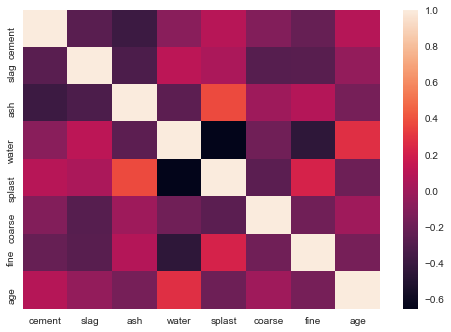

In [12]:
import seaborn as sns
sns.heatmap(X_c.corr())

In [13]:
X_c.corr()

,cement,slag,ash,water,splast,coarse,fine,age
cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947
slag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246
ash,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370
water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604
splast,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717
coarse,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016
fine,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094
age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000
